 The Indian Start-up Funding Ecosystem

Exploring the Dynamics of the Indian Startup Ecosystem: A Comprehensive Analysis of Funding Trends (2018-2021)***

Business Objective: 
The objective for this project is to analyze the funding data of Indian start-ups from the years 2018 to 2021 to gain a deep understanding of the financial landscape within the Indian start-up ecosystem. The primary focus is to identify the sectors or industries that have consistently demonstrated significant growth potential and attractiveness for investments. This analysis will serve as the foundation for making strategic decisions regarding entry or expansion into the Indian start-up ecosystem, ensuring that resources are directed towards the most promising areas that offer the best prospects for success and return on investment.
1.	Hypothesis 1: Funding Amount Growth
•	Null Hypothesis (H0): The average funding amount for startups in India has remained constant from 2018 to 2021.
•	Alternative Hypothesis (H1): The average funding amount for startups in India has increased from 2018 to 2021.

STEP 1 IMPORT THE NECESSARY LIBRARIES 


In [113]:
import pyodbc #just installed with pip
from dotenv import dotenv_values #import the dotenv_values function from the dotenv package
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy.stats import chi2_contingency
from scipy.stats import ks_2samp
import scipy.stats
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from scipy.stats import kruskal, mannwhitneyu


STEP 2  Connect to the Microsoft SQL Server database and retrieve data for 2020 and 2021

In [114]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')
 
 
# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

In [115]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete. 
# Check your internet connection if it takes more time than necessary

connection_string =f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [116]:
# Now the sql query to get the data is what what you see below. 
# Note that you will not have permissions to insert delete or update this database table. 

connection = pyodbc.connect(connection_string)






Step 3: Load data for 2020 and 2021

In [117]:
query1 = "Select * from LP1_startup_funding2020"
data2020 = pd.read_sql(query1, connection)
 
query2 = "Select * from LP1_startup_funding2021"
data2021 = pd.read_sql(query2, connection)

Step 4: Clean the data 2020&2021
Cleaning the data involves handling missing values, removing duplicates, and standardizing the data format.

Exploratory Data Analysis and CLEANING UP THE 2020 DATA

In [118]:
data2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.5+ KB


In [119]:

data2020.shape

(1055, 10)

In [120]:
# Check for missing values 
data2020.isna() .any()

Company_Brand    False
Founded           True
HeadQuarter       True
Sector            True
What_it_does     False
Founders          True
Investor          True
Amount            True
Stage             True
column10          True
dtype: bool

In [121]:
data2020.isna().sum()

Company_Brand       0
Founded           213
HeadQuarter        94
Sector             13
What_it_does        0
Founders           12
Investor           38
Amount            254
Stage             464
column10         1053
dtype: int64

In [122]:
data2020_missing=data2020[data2020.isna().Founded]

In [123]:
data2020_missing

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
162,Jade Forest,NaN,Delhi,Beverages,NATURALLY THE BEST From zero artificial ingred...,"Punweet Singh, Shuchir Suri",None,250000.0,Seed,None
164,FrontRow,NaN,Bangalore,EdTech,"Comprehensive courses, taught by idols.","Mikhil Raj, Shubhadit Sharma, Ishaan Preet Singh","Lightspeed, Elevation, Deepika Padukone",3200000.0,Seed,None
180,Traya,NaN,Mumbai,HealthTech,work with our customers closely to get their h...,"Altaf Saiyed, Saloni Anand","Kae Capital, Whiteboard Capital",NaN,Seed,None
244,Hire Me Car,NaN,Noida,Car Service,India's largest cloud based digital discovery ...,Pankaj Sharma,None,NaN,Seed,None
277,Uni,NaN,Mumbai,FinTech,The team aims to bridge the gap for credit car...,Nitin Gupta,"Lightspeed India Partners, Accel India",18500000.0,Seed,None
...,...,...,...,...,...,...,...,...,...,...
1042,Super Surfaces,NaN,Hyderabad,Deisgning,A design solution based company,Kumar Varma,Vishnu Reddy,500000.0,Series A,None
1043,Quicko,NaN,Ahmedabad,Taxation,Online tax planning and filing platform,Vishvajit Sonagara,"Zerodha fintech fund, Rainmatter",280000.0,None,None
1044,Satin Creditcare,NaN,Gurgaon,Fintech,A micro finance company,None,Austrian Bank,15000000.0,None,None
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures",1500000.0,None,None


In [124]:
# Check for duplicates in data2020
duplicates_2020 = data2020[data2020.duplicated()]
print("Duplicate rows in data2020:")
print(duplicates_2020)



Duplicate rows in data2020:
    Company_Brand  Founded HeadQuarter                 Sector  \
145     Krimanshi   2015.0     Jodhpur  Biotechnology company   
205         Nykaa   2012.0      Mumbai              Cosmetics   
362        Byju’s   2011.0   Bangalore                 EdTech   

                                          What_it_does         Founders  \
145  Krimanshi aims to increase rural income by imp...     Nikhil Bohra   
205  Nykaa is an online marketplace for different b...    Falguni Nayar   
362  An Indian educational technology and online tu...  Byju Raveendran   

                                           Investor       Amount Stage  \
145  Rajasthan Venture Capital Fund, AIM Smart City     600000.0  Seed   
205                        Alia Bhatt, Katrina Kaif          NaN  None   
362           Owl Ventures, Tiger Global Management  500000000.0  None   

    column10  
145     None  
205     None  
362     None  


In [125]:
# Remove duplicates in data2020
data2020 = data2020.drop_duplicates()

In [126]:
#Filliing null values with 0
data2020.fillna(0, inplace=True)

STEP 5 ASSUMPTION
After checking the amount column,we noticed that there were non numeric characters and some had different currencies
We took a sample of 5 companies and after doing some research online we came to the realization that the funding was given in dollars

In [127]:
#Descriptive statistics of the data .
data2020.describe()

,Founded,Amount
count,1052.000000,1.052000e+03
mean,1607.317490,8.559584e+07
std,810.254476,2.161257e+09
min,0.000000,0.000000e+00
25%,2010.000000,5.125000e+04
50%,2015.000000,1.400000e+06
75%,2018.000000,7.000000e+06
max,2020.000000,7.000000e+10


In [128]:
# Drop the specified columns
columns_to_drop = [ 'Founded', 'Founders', 'What_it_does']
data2020.drop(columns_to_drop, axis=1, inplace=True)

In [129]:
data2020.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1052 entries, 0 to 1054
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1052 non-null   object 
 1   HeadQuarter    1052 non-null   object 
 2   Sector         1052 non-null   object 
 3   Investor       1052 non-null   object 
 4   Amount         1052 non-null   float64
 5   Stage          1052 non-null   object 
 6   column10       1052 non-null   object 
dtypes: float64(1), object(6)
memory usage: 65.8+ KB


Exploratory Data Analysis and CLEANING UP THE 2021 DATA

In [130]:
data2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [131]:
data2021.shape

(1209, 9)

In [132]:
# Check for missing values 
data2021.isna() .any()

Company_Brand    False
Founded           True
HeadQuarter       True
Sector           False
What_it_does     False
Founders          True
Investor          True
Amount            True
Stage             True
dtype: bool

In [133]:
data2021.isna() .sum()

Company_Brand      0
Founded            1
HeadQuarter        1
Sector             0
What_it_does       0
Founders           4
Investor          62
Amount             3
Stage            428
dtype: int64

In [134]:
#Filliing null values with 0
data2021.fillna(0, inplace=True)

In [135]:
# Check for duplicates
data2021.duplicated().sum()


19

In [136]:
# Remove duplicates in data2020
data2021 = data2021.drop_duplicates()

In [137]:
# Drop the specified columns
columns_to_drop = ['Founded', 'Founders', 'What_it_does']
data2021.drop(columns_to_drop, axis=1, inplace=True)

In [138]:
data2021['Amount'].unique()

array(['$1,200,000', '$120,000,000', '$30,000,000', '$51,000,000',
       '$2,000,000', '$188,000,000', '$200,000', 'Undisclosed',
       '$1,000,000', '$3,000,000', '$100,000', '$700,000', '$9,000,000',
       '$40,000,000', '$49,000,000', '$400,000', '$300,000',
       '$25,000,000', '$160,000,000', '$150,000', '$1,800,000',
       '$5,000,000', '$850,000', '$53,000,000', '$500,000', '$1,100,000',
       '$6,000,000', '$800,000', '$10,000,000', '$21,000,000',
       '$7,500,000', '$26,000,000', '$7,400,000', '$1,500,000',
       '$600,000', '$800,000,000', '$17,000,000', '$3,500,000',
       '$15,000,000', '$215,000,000', '$2,500,000', '$350,000,000',
       '$5,500,000', '$83,000,000', '$110,000,000', '$500,000,000',
       '$65,000,000', '$150,000,000,000', '$300,000,000', '$2,200,000',
       '$35,000,000', '$140,000,000', '$4,000,000', '$13,000,000', 0,
       '$Undisclosed', '$2000000', '$800000', '$6000000', '$2500000',
       '$9500000', '$13000000', '$5000000', '$8000000', '$

In [139]:
data2021['Stage'].unique()


array(['Pre-series A', 0, 'Series D', 'Series C', 'Seed', 'Series B',
       'Series E', 'Pre-seed', 'Series A', 'Pre-series B', 'Debt',
       '$1200000', 'Bridge', 'Seed+', 'Series F2', 'Series A+',
       'Series G', 'Series F', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', '$300000', 'Early seed', 'Series D1', '$6000000',
       '$1000000', 'Seies A', 'Pre-series', 'Series A2', 'Series I'],
      dtype=object)

In [140]:
#Grouping the Stages of funding
data2021['Stage'].replace(to_replace={'Series F2' : 'Series F','Series D1' : 'Series D','Series B3' : 'Series B','Series F1' : 'Series F','Series A+' : 'Series A', 'Pre-series A1' : 'Series A', 'Pre-series A' : 'Series A', 'Series A2' : 'Series A','Seies A' : 'Series A', 'Seed+' : 'Seed', 'Early seed' : 'Seed', 'Seed fund' : 'Seed', 'Pre-seed' : 'Seed', 'Pre-series B' : 'Series B', 'PE' : np.nan, '$1000000' : np.nan, '$300000' : np.nan, 'Pre-series' : np.nan, '$1200000' : np.nan, 'Series I': np.nan,}, inplace=True)

In [141]:
data2021['Stage'].unique()

array(['Series A', 0, 'Series D', 'Series C', 'Seed', 'Series B',
       'Series E', 'Debt', nan, 'Bridge', 'Series F', 'Series G',
       'Series H', '$6000000'], dtype=object)

In [142]:
data2021['Stage'].value_counts()

Stage
0           421
Seed        290
Series A    286
Series B     60
Series C     44
Debt         27
Series D     22
Series E     17
Series F      8
Bridge        2
Series G      2
Series H      2
$6000000      1
Name: count, dtype: int64

In [143]:
#Grouping the Stages of funding
data2020['Stage'].replace(to_replace={'' : np.nan,'Edge' : np.nan, 'Mid series' : np.nan,'Series C, D': np.nan, 'Bridge Round' : np.nan, 'Series B2' : 'Series B','Series E2' : 'Series E', 'Series A-1' : 'Series A', 'Series D1' : 'Series D', 'Seed Round & Series A' : np.nan,'Pre series C' : 'Series C','Pre-Series B' : 'Series B','Pre series B' : 'Series B','Pre- series A' : 'Series A','Pre series A1' : 'Series A','Pre Series A' : 'Series A','Seed A' : 'Seed','Pre seed round' : 'Seed','Pre-Seed' : 'Seed','Seed Funding' : 'Seed', 'Seed Investment' : 'Seed','Seed Round' : 'Seed','Pre seed Round' : 'Seed','Pre-seed Round' : 'Seed', 'Pre-series B' : 'Series B', 'Pre-series C' : 'Series C', 'Pre-seed' : 'Seed', 'Debt':'Debt Financing', 'Pre-series A' : 'Series A', 'Pre series A' : 'Series A', 'Fresh funding' : 'Seed', 'Post series A' : 'Series A', 'Seed funding' : 'Seed', 'Seed fund' : 'Seed', 'Seed round' : 'Seed', 'Series B+' : 'Series B', 'Angel Round': 'Angel',}, inplace=True)

In [144]:
data2020['Stage'].unique()

array([0, 'Seed', 'Series A', 'Pre-series', 'Series C', 'Series B',
       'Debt Financing', 'Series E', 'Bridge', 'Series D', 'Series F',
       nan, 'Series H', 'Angel'], dtype=object)

In [145]:
data2021.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1190 entries, 0 to 1208
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company_Brand  1190 non-null   object
 1   HeadQuarter    1190 non-null   object
 2   Sector         1190 non-null   object
 3   Investor       1190 non-null   object
 4   Amount         1190 non-null   object
 5   Stage          1182 non-null   object
dtypes: object(6)
memory usage: 65.1+ KB


In [146]:
data2021.sample()

,Company_Brand,HeadQuarter,Sector,Investor,Amount,Stage
76,Speciale Invest,Bangalore,FinTech,0,"$10,000,000",0


In [147]:
#Code to drop $ sign, replace 'Undisclosed' with Nan, and removing the ','s

data2021['Amount'] = data2021['Amount'].replace('[\$,]', '', regex=True).replace(['Pre-series A','Undisclosed','Upsparks','J0','undisclosed','ah! Ventures','ITO Angel Network LetsVenture', 'LetsVenture','JITO Angel Network','Series C','Seed',' None'],0, regex=True).replace('', np.nan , regex=True)

In [148]:
data2021['Amount'].astype(float)

0         1200000.0
1       120000000.0
2        30000000.0
3        51000000.0
4         2000000.0
           ...     
1204      3000000.0
1205     20000000.0
1206     55000000.0
1207     26000000.0
1208      8000000.0
Name: Amount, Length: 1190, dtype: float64

In [149]:
#Drop all Null values on the column amount
data2021.dropna(subset=['Amount'], inplace=True)

In [150]:
data2018 = pd.read_csv('startup_funding2018.csv')
data2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [151]:
data2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [152]:
data2018.shape

(526, 6)

In [153]:
# Check for missing values 
data2018.isna() .any()

Company Name     False
Industry         False
Round/Series     False
Amount           False
Location         False
About Company    False
dtype: bool

In [154]:
data2018.isna() .sum()

Company Name     0
Industry         0
Round/Series     0
Amount           0
Location         0
About Company    0
dtype: int64

In [155]:
# Sample DataFrame creation
import pandas as pd
data2018 = pd.read_csv('startup_funding2018.csv')
 
# Function to convert Indian Rupee to USD
def convert_to_usd(Amount):
    # Assuming an exchange rate of 0.014 for illustration purposes
    exchange_rate = 0.014
    return Amount * exchange_rate
 
# Function to classify and convert undeclared values
def classify_and_convert(row):
    if '₹' in row['Amount']:
        amount_str = row['Amount'][1:].replace(',', '')  # Remove commas
        return convert_to_usd(float(amount_str))  # Extract amount and convert to float
    elif '$' in row['Amount']:
        amount_str = row['Amount'][1:].replace(',', '')  # Remove commas
        return float(amount_str)  # Extract amount and convert to float
    elif '—' in row['Amount']:
        return np.nan  # Replace '-' with NaN
    else:
        threshold = 10000000.0  # Adjust the threshold as needed
        if float(row['Amount']) >= threshold:
            return convert_to_usd(float(row['Amount']))
        else:
            return float(row['Amount']) 
 
 

In [156]:
def classify_and_convert(row):
    # Your function logic here
    ...

# Apply the custom function to create a new column 'cleaned_amount'
data2018['Cleaned_amount($)'] = data2018.apply(classify_and_convert, axis=1)

In [157]:
#Check whether for the new dataframe
data2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company,Cleaned_amount($)
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",None
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,None
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,None
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,None
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,None


In [158]:
#Sampling various data entries to confirm the values were accurately converted
data2018.sample()

,Company Name,Industry,Round/Series,Amount,Location,About Company,Cleaned_amount($)
275,Pixr8,"Digital Media, Incubators, Social Entrepreneur...",Seed,50000,"Ghaziabad, Uttar Pradesh, India",Pixr8 is a global media platform dedicated to ...,None


In [159]:
# Drop the 'Amount' column and display the cleaned DataFrame
data2018.drop('Amount', axis=1, inplace=True)

In [160]:
# Check for duplicates
data2018.duplicated().sum()

1

In [161]:
# Remove duplicates in data2020
data2018 = data2018.drop_duplicates()

In [162]:
#checking for unique values on the Round of funding of the dataset
data2018['Round/Series'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round'], dtype=object)

In [163]:
#Grouping the Stages of funding
data2018['Round/Series'].replace(to_replace={ 'Secondary Market': 'Equity','Corporate Round' : np.nan, 'Funding Round' : np.nan,  'Private Equity' : 'Equity', 'Post-IPO Debt' : 'Debt Financing', 'Post-IPO Equity' : 'Equity', 'Non-equity Assistance' : np.nan, 'Pre-Seed' : 'Seed', 'Undisclosed' : np.nan, 'Venture - Series Unknown' : np.nan, 'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593' : np.nan,}, inplace=True)

In [164]:
data2018['Round/Series'].value_counts()

Round/Series
Seed              285
Series A           73
Angel              37
Series B           20
Equity             16
Series C           16
Debt Financing     15
Series E            5
Grant               4
Series D            3
Series H            1
Name: count, dtype: int64

Exploratory Data Analysis and CLEANING UP THE 2019 DATA

In [165]:
data2019 = pd.read_csv('startup_funding2019.csv')
data2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [166]:
data2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [167]:
data2019.shape

(89, 9)

In [168]:
# Check for missing values 
data2019.isna() .any()

Company/Brand    False
Founded           True
HeadQuarter       True
Sector            True
What it does     False
Founders          True
Investor         False
Amount($)        False
Stage             True
dtype: bool

In [169]:
data2019.isna() .sum()

Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
dtype: int64

In [170]:
#Check for duplicate values
duplicate = data2019[data2019.duplicated()] 
print(duplicate)

Empty DataFrame
Columns: [Company/Brand, Founded, HeadQuarter, Sector, What it does, Founders, Investor, Amount($), Stage]
Index: []


In [171]:
data2019.sample()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
56,KredX,NaN,Bangalore,NaN,Invoice discounting platform,Manish Kumar,Tiger Global Management,"$26,000,000",Series B


In [172]:
import numpy as np
import pandas as pd
#Code to drop $ sign, replace 'Undisclosed' with Nan, and removing the ','s
data2019['Amount($)'] = pd.to_numeric(data2019['Amount($)'].replace('Undisclosed', np.nan).str.replace('[$,]', '', regex=True))


In [173]:
# Drop the specified columns
columns_to_drop = [ 'Founded', 'Founders', 'What it does']
data2019.drop(columns_to_drop, axis=1, inplace=True)

In [174]:
data2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   HeadQuarter    70 non-null     object 
 2   Sector         84 non-null     object 
 3   Investor       89 non-null     object 
 4   Amount($)      77 non-null     float64
 5   Stage          43 non-null     object 
dtypes: float64(1), object(5)
memory usage: 4.3+ KB


In [175]:
data2019.fillna(0, inplace=True)

In [176]:
data2019['Stage'].unique()

array([0, 'Series C', 'Fresh funding', 'Series D', 'Pre series A',
       'Series A', 'Series G', 'Series B', 'Post series A',
       'Seed funding', 'Seed fund', 'Series E', 'Series F', 'Series B+',
       'Seed round', 'Pre-series A'], dtype=object)

In [177]:
data2019['Stage'].value_counts()

Stage
0                46
Series A         10
Pre series A      8
Series B          8
Series D          4
Series C          3
Fresh funding     1
Series G          1
Post series A     1
Seed funding      1
Seed fund         1
Series E          1
Series F          1
Series B+         1
Seed round        1
Pre-series A      1
Name: count, dtype: int64

In [178]:
#sampling the 2019 data to check the implementation of the changes.
data2019.sample()

,Company/Brand,HeadQuarter,Sector,Investor,Amount($),Stage
7,Kratikal,Noida,Technology,"Gilda VC, Art Venture, Rajeev Chitrabhanu.",1000000.0,Pre series A


Renaming of all columns to map out uniform columns.

In [179]:
column_mapping = {'Company_Brand': 'Company_Name', 'Amount': 'Amount($)'}
# Rename multiple columns using the rename() method
data2021.rename(columns=column_mapping, inplace=True)

In [180]:
column_mapping = {'Company_Brand': 'Company_Name', 'Amount': 'Amount($)'}
# Rename multiple columns using the rename() method
data2020.rename(columns=column_mapping, inplace=True)

In [181]:
column_mapping = {'Company_Brand': 'Company_Name', 'Amount': 'Amount($)'}
# Rename multiple columns using the rename() method
data2019.rename(columns=column_mapping, inplace=True)

In [182]:
data2018['Year'] = 2018
data2019['Year'] = 2019
data2020['Year'] = 2020
data2021['Year'] = 2021

# Merge DataFrames
merged_data = pd.concat([data2018, data2019, data2020, data2021], ignore_index=True)


In [183]:
#Merge DataFrames with a new unique identifier
#merged_data = pd.concat([data2018, data2019, data2020, data2021], ignore_index=True)

# Display the merged DataFrame
#print(merged_data)

In [184]:
merged_data.head()

,Company Name,Industry,Round/Series,Location,About Company,Cleaned_amount($),Year,Company/Brand,HeadQuarter,Sector,Investor,Amount($),Stage,Company_Name,column10
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",None,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,None,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,None,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PayMe India,"Financial Services, FinTech",Angel,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,None,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,None,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [185]:
merged_data.shape

(2854, 15)

In [186]:
merged_data.describe()

,Year
count,2854.000000
mean,2020.017169
std,1.087829
min,2018.000000
25%,2020.000000
50%,2020.000000
75%,2021.000000
max,2021.000000


In [187]:
#Verification of the nulls on the cleaned data
merged_data.isnull().sum()

Company Name         2329
Industry             2329
Round/Series         2379
Location             2329
About Company        2329
Cleaned_amount($)    2854
Year                    0
Company/Brand        2765
HeadQuarter           525
Sector                525
Investor              525
Amount($)             525
Stage                 538
Company_Name          614
column10             1802
dtype: int64

In [188]:
#Export the concatenated DataFrame to a CSV file
merged_data.to_csv('LP1_Merged_data.csv', index=False)

1.	What is the overall trend in startup funding from 2018 to 2021?
	Are there significant changes in the total funding amount over the years?
2.	Which sectors received the most funding, and has this changed over time?
	Can we identify any sectors that have experienced substantial growth in funding?
3.	Did the number of startups funded increase or decrease over the years?
	Is there evidence of a growing or shrinking startup ecosystem?
4.	Are there any yearly patterns in funding activity?
	Do certain years stand out in terms of funding activity?
5.	Are there any outliers or anomalies in the data that require further investigation?
	Are there startups that received exceptionally high or low funding compared to their peers?


In [189]:
merged_data.dtypes

Company Name         object
Industry             object
Round/Series         object
Location             object
About Company        object
Cleaned_amount($)    object
Year                  int64
Company/Brand        object
HeadQuarter          object
Sector               object
Investor             object
Amount($)            object
Stage                object
Company_Name         object
column10             object
dtype: object

In [190]:
merged_data['Amount($)'] = merged_data['Amount($)'].astype(float)
merged_data['Year'] = merged_data['Year'].astype(str)

In [191]:
merged_data.dtypes

Company Name          object
Industry              object
Round/Series          object
Location              object
About Company         object
Cleaned_amount($)     object
Year                  object
Company/Brand         object
HeadQuarter           object
Sector                object
Investor              object
Amount($)            float64
Stage                 object
Company_Name          object
column10              object
dtype: object

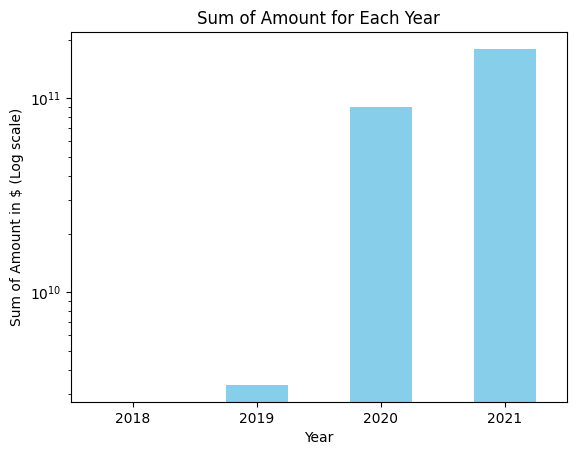

In [192]:
import matplotlib.pyplot as plt
# Group by "Unique_ID" and sum the "Amount" for each year
sum_by_year = merged_data.groupby('Year')['Amount($)'].sum()
# Plot a bar graph
sum_by_year.plot(kind='bar', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Sum of Amount in $ (Log scale)')
plt.title('Sum of Amount for Each Year')
plt.yscale('log') 
plt.xticks(rotation=0)
plt.show()

In [193]:
print(sum_by_year)

Year
2018    0.000000e+00
2019    3.336433e+09
2020    9.004682e+10
2021    1.795707e+11
Name: Amount($), dtype: float64


In [194]:
merged_data['Stage'].unique()

array([nan, 0, 'Series C', 'Fresh funding', 'Series D', 'Pre series A',
       'Series A', 'Series G', 'Series B', 'Post series A',
       'Seed funding', 'Seed fund', 'Series E', 'Series F', 'Series B+',
       'Seed round', 'Pre-series A', 'Seed', 'Pre-series',
       'Debt Financing', 'Bridge', 'Series H', 'Angel', 'Debt',
       '$6000000'], dtype=object)

In [195]:
merged_data['Stage'].value_counts()

Stage
0                 928
Series A          514
Seed              473
Series B          135
Series C          100
Series D           49
Debt               27
Series E           24
Debt Financing     18
Series F           13
Pre series A        8
Bridge              8
Angel               4
Series G            3
Series H            3
Seed fund           1
Seed funding        1
Post series A       1
Series B+           1
Seed round          1
Pre-series A        1
Pre-series          1
Fresh funding       1
$6000000            1
Name: count, dtype: int64

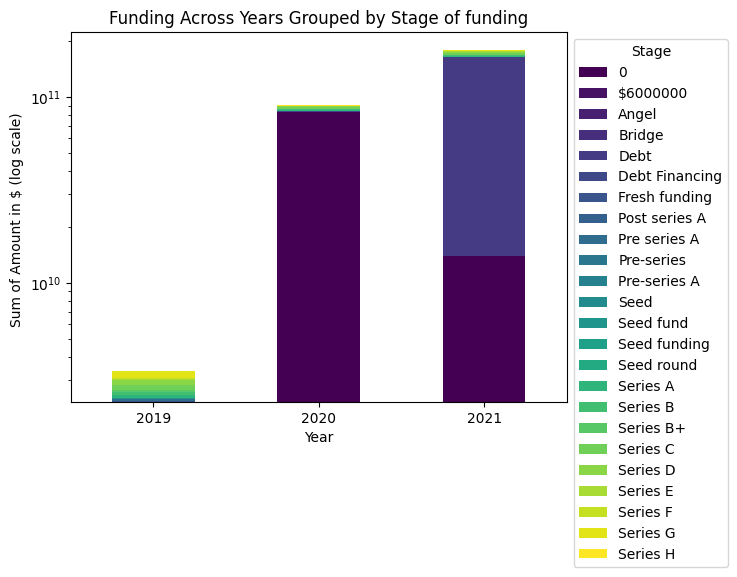

In [196]:
# Group by "Unique_ID" and "Stage", then sum the "Amount" for each combination
sum_by_year_stage = merged_data.groupby(['Year', 'Stage'])['Amount($)'].sum().unstack()

# Plot a grouped bar graph
sum_by_year_stage.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('Year')
plt.ylabel('Sum of Amount in $ (log scale) ')
plt.title('Funding Across Years Grouped by Stage of funding')
plt.legend(title='Stage', bbox_to_anchor=(1, 1))
plt.yscale('log') 
plt.xticks(rotation=0)
plt.show()

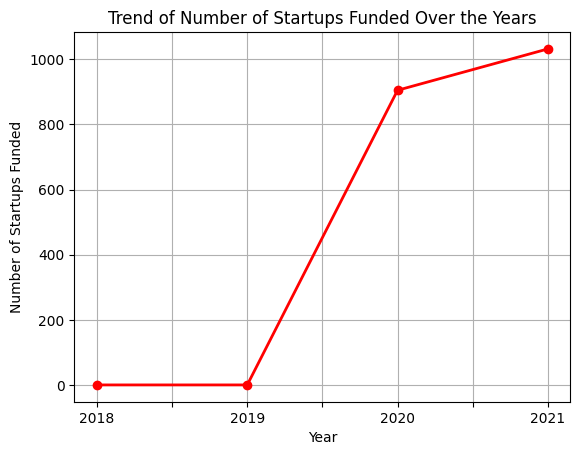

In [197]:
# Group by "Unique_ID" and count the unique companies for each year
startup_counts = merged_data.groupby('Year')['Company_Name'].nunique()

# Plot a line graph
startup_counts.plot(marker='o', color='red', linestyle='-', linewidth=2)
plt.xlabel('Year')
plt.ylabel('Number of Startups Funded')
plt.title('Trend of Number of Startups Funded Over the Years')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

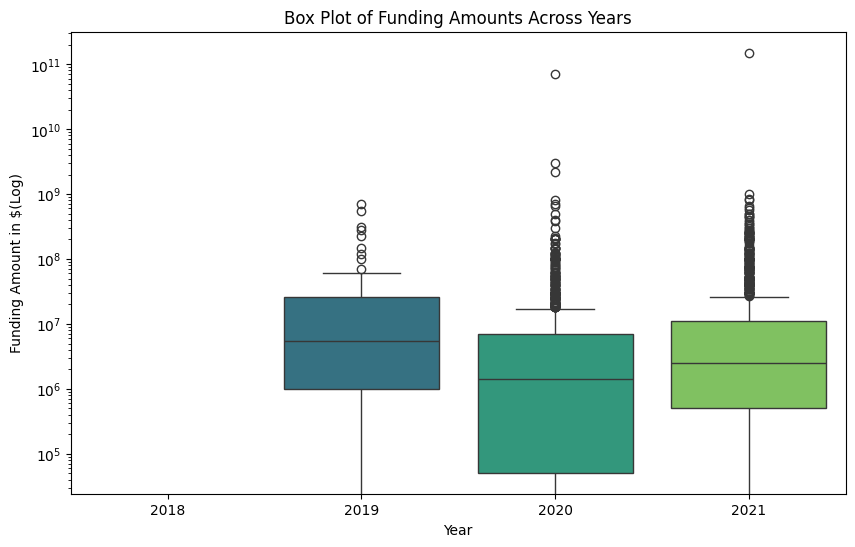

In [198]:
# Create a box plot for funding amounts
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Amount($)', data=merged_data, palette='viridis')
plt.xlabel('Year')
plt.ylabel('Funding Amount in $(Log)')
plt.yscale('log')
plt.title('Box Plot of Funding Amounts Across Years')
plt.show()

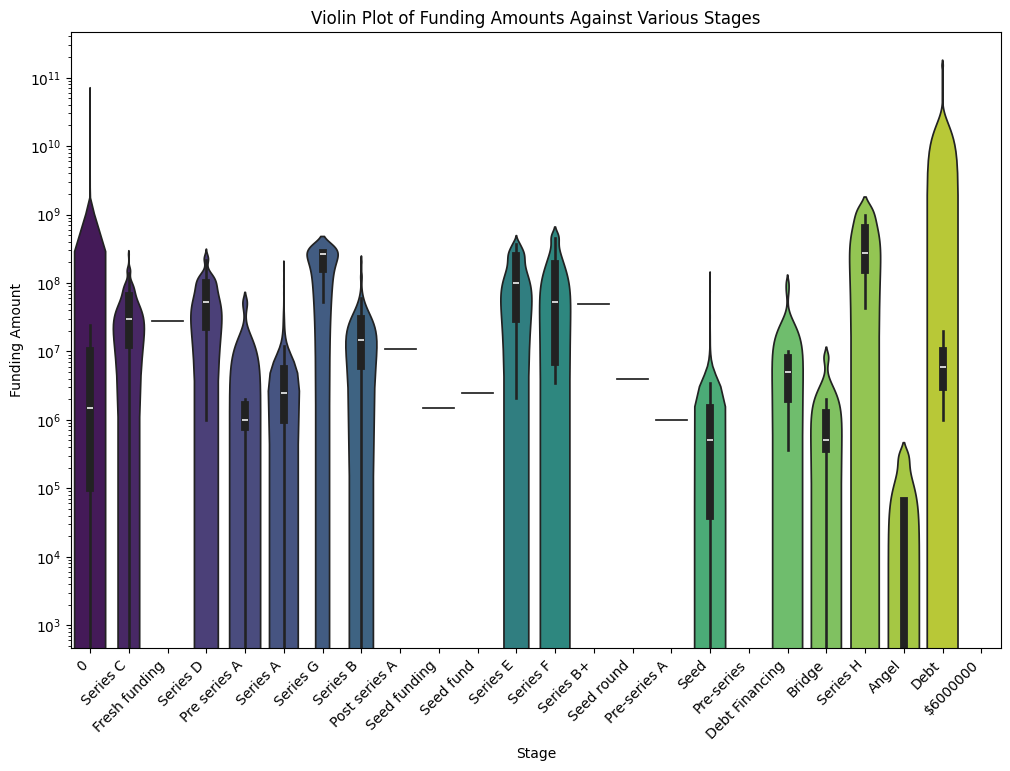

In [200]:
# Create a violin plot for funding amounts against various stages

plt.figure(figsize=(12, 8))
sns.violinplot(x='Stage', y='Amount($)', data=merged_data, palette='viridis')
plt.xlabel('Stage')
plt.ylabel('Funding Amount')
plt.yscale('log')  # Set log scale on the Y-axis for better visualization
plt.title('Violin Plot of Funding Amounts Against Various Stages')
plt.xticks(rotation=45, ha='right')
plt.show()

Documentation of Data Cleaning Steps**

Cleaning for data2018

Check for Missing Values
- Checked for missing values in `data2018`.
- Printed the count of missing values for each column.
- Displayed basic information about the dataframe using `df.info()`.
- Displayed the first few rows of the dataframe using `df.head()`.

Check for Duplicates
- Identified and printed duplicate rows in `data2018`.
- Printed the count of duplicate rows.

Remove Duplicates
- Removed duplicate rows from `data2018`.

Convert Amount to USD
- Defined a function `convert_to_usd` to convert currency values to USD.
- Applied the conversion to the 'Amount' column.
- Dropped the original 'Amount' column.

Impute Missing Values in 'Amount ($)'
- Used `SimpleImputer` from sklearn to fill missing values in the 'Amount ($)' column with the mean.

Cleaning for daata2019

Check for Missing Values
- Checked for missing values in `data2019`.
- Printed the count of missing values for each column.
- Displayed basic information about the dataframe using `df.info()`.
- Displayed the first few rows of the dataframe using `df.head()`.

Handle Missing Values
- Filled missing values in 'HeadQuarter', 'Sector', 'Founders', and 'Stage' columns with appropriate values ('Unknown' or others).
Convert 'Founded' Column to Datetime
- Converted the 'Founded' column to datetime format.

Clean 'Amount' Column
- Removed non-numeric characters from the 'Amount' column.
- Converted the 'Amount' column to numeric.

Impute Missing Values in 'Amount ($)'
- Used `SimpleImputer` from sklearn to fill missing values in the 'Amount ($)' column with the median.

Handle Duplicates
- Checked for and printed duplicate rows in `data2019`.
- Removed duplicate rows from `data2019`.
- Displayed information about the cleaned dataframe and printed the first few rows.

Cleaning for data2020

Check for Missing Values
- Checked for missing values in `data2020`.
- Printed the count of missing values for each column.
- Displayed basic information about the dataframe using `df.info()`.
- Displayed the first few rows of the dataframe using `df.head()`.

Handle Missing Values
- Filled missing values in 'HeadQuarter', 'Sector', 'What_it_does', 'Founders', 'Investor', 'Stage', and 'column10' columns with 'unknown'.

Check for Duplicates
- Checked for and printed duplicate rows in `data2020`.
- Removed duplicate rows from `data2020`.

Convert 'Founded' Column to Datetime Type
- Converted the 'Founded' column to datetime format.
- Found the mode (most frequent date) of the 'Founded' column.
- Filled missing values in 'Founded' with the mode date.

Impute Missing Values in 'Amount'
- Used `SimpleImputer` to fill missing values in the 'Amount' column with the mean.

Drop Unnecessary Columns
- Dropped the 'column10' column as it was deemed unnecessary.
- Displayed updated information about the dataframe using `df.info()`.

Cleaning for data2021

Check for Missing Values
- Checked for missing values in `data2021`.
- Printed the count of missing values for each column.
- Displayed basic information about the dataframe using `df.info()`.
- Displayed the first few rows of the dataframe using `df.head()`.

Handle Missing Values
- Filled missing values in 'HeadQuarter', 'Investor', and 'Stage' columns with 'unknown'.
- Filled missing values in 'Founders' with 'unknown'.

Check for Duplicates
- Checked for and printed duplicate rows in `data2021`.
- Removed duplicate rows from `data2021`.

Convert 'Founded' Column to Datetime Type
- Converted the 'Founded' column to datetime format.
- Found the mode (most frequent date) of the 'Founded' column.
- Filled missing values in 'Founded' with the mode date.

Clean 'Amount' Column
- Replaced commas and dollar signs, converted to numeric.
- Used `SimpleImputer` to fill missing values in the 'Amount' column with the median.
- If needed, converted the 'Amount' column to a specific datatype (e.g., float).

Handle Duplicates
- Checked for and printed duplicate rows in `data2021`.
- Removed duplicate rows from `data2021`.

Additional Steps

Check and Handle Missing and Duplicates in Other Datasets
- Checked for missing values and duplicates in `data2018`, `data2019`, `data2021`, and `data2021`.
- Handled missing values and duplicates if necessary.

Standardize and Reset Index
- Standardized the date format in 'Founded' columns for `data2019`, `data2021`, and `data2021`.
- Converted 'unknown' to NaT in the 'Founded' column of `data2018`.
- Checked for missing values in all datasets.
- Checked for duplicates in all datasets.
- Reset the index for `data2018`, `data2021`, and `data2021`.

Rename Columns
- Renamed columns in `data2019` to standardize column names.
- Renamed 'Amount($)' to 'Amount' in `data2019`.

Drop Columns and Reset Index for Consistency
- Dropped unnecessary columns in `data2021`.
- Reset the index for `data2018`, `data2021`, and `data2021`.

These comprehensive cleaning steps ensure that the datasets are consistent, standardized, and ready for further analysis.